# Traffic Sign Recognition 

## 1. Traffic Sign Classification

In [1]:
import random

This module implements pseudo-random number generators for various distributions.

For integers, uniform selection from a range. For sequences, uniform selection of a random element, a function to generate a random permutation of a list in-place, and a function for random sampling without replacement.

In [2]:
import os

This module provides a portable way of using operating system dependent functionality. If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module, and if you want to read all the lines in all the files on the command line see the fileinput module.

In [3]:
import skimage.data

This is used from the scikit-image library (under sklearn). 

In [4]:
import skimage.transform

This is used from the scikit-image library (under sklearn). 

In [5]:
import matplotlib

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

In [6]:
import matplotlib.pyplot as plt


Matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that “axes” here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).

In [7]:
import numpy as np


NumPy is the fundamental package for scientific computing with Python. It contains among other things:

    a powerful N-dimensional array object
    sophisticated (broadcasting) functions
    tools for integrating C/C++ and Fortran code
    useful linear algebra, Fourier transform, and random number capabilities

In [8]:
import tensorflow as tf

TensorFlow is an open-source software library for machine learning across a range of tasks. It is a system for building and training neural networks to detect and decipher patterns and correlations, analogous to (but not the same as) human learning and reasoning.

In [9]:
%matplotlib inline

 Allow image embeding in notebook

### 1.1 Training Dataset

In Testing and Training folder, there are 62 folders each. 

#### 1.1.1 Initial loading of the training data

The file format in which the dataset is saved is .ppm. 

In [ ]:
def load_dataset(data_dir):
    #There is an image and a label. Image contains the raw images and labels contains the corresponsing labels of images
    
    # All the sub-directories of data_dir represent a label
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    
    labels = []               #list for labels
    images = []               #list for images
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, images are loaded and added to the images' list
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels


# Load training and testing datasets.
ROOT_PATH = "/traffic"
train_data_dir = os.path.join(ROOT_PATH, "/home/soubhik/Persistent/trafficsigns/Training")
test_data_dir = os.path.join(ROOT_PATH, "/home/soubhik/Persistent/trafficsigns/Testing")

images, labels = load_dataset(train_data_dir)

2 lists are loaded.

Images are loaded using numpy arrays and labels are loaded using corresponding labels. 

### 1.2 Using the dataset

In [14]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 62
Total Images: 4575


Display the first image of each label.

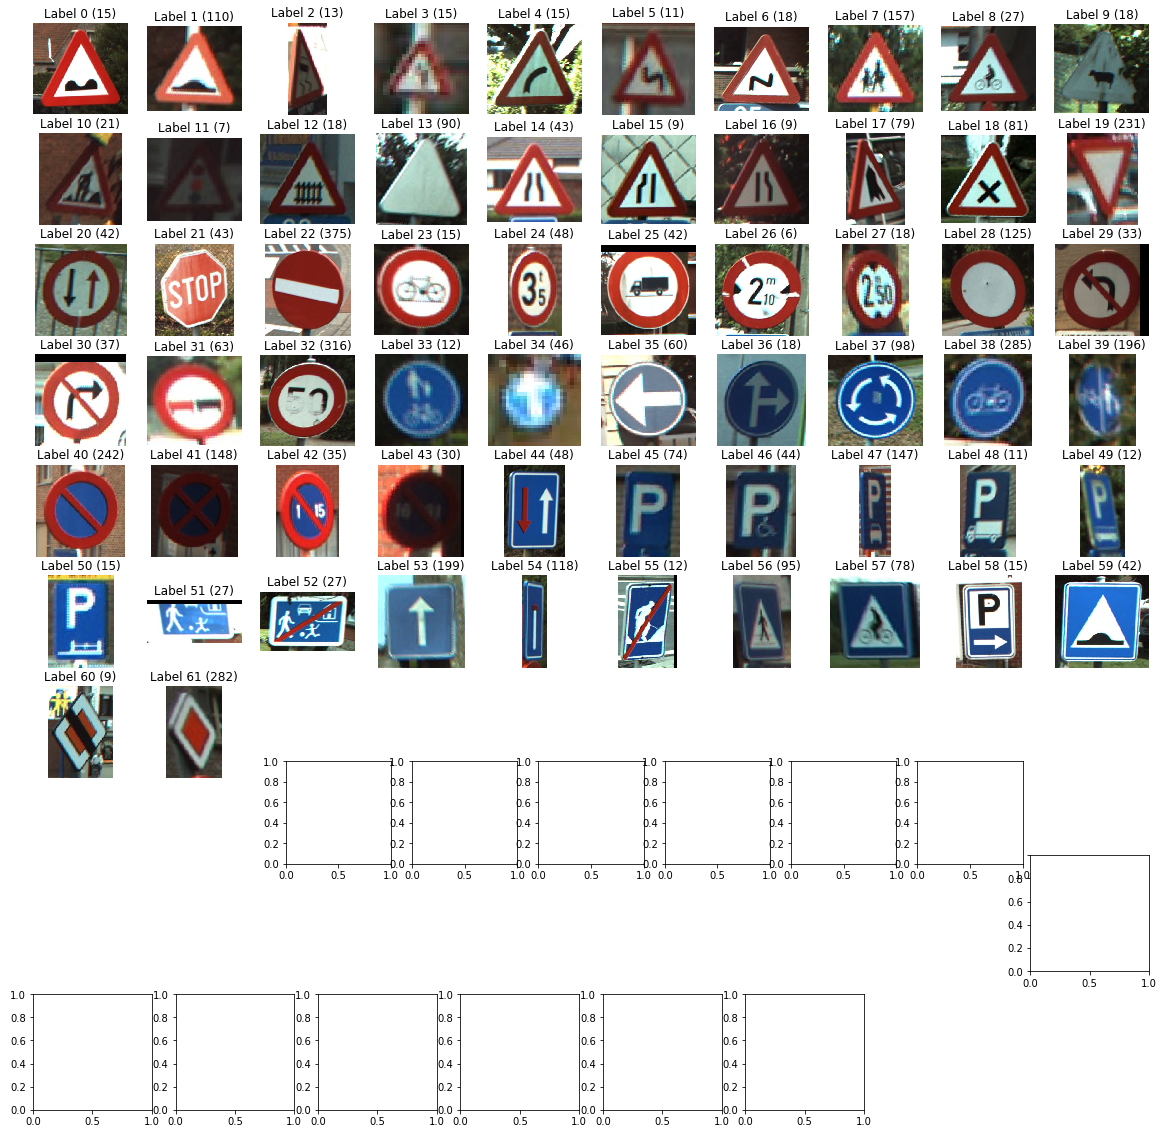

In [29]:
def display_both(images, labels):
                                       #Used for displaying the first label of each image
    unique_labels = set(labels)
    plt.figure(figsize=(20, 20))
    i = 1
    for label in unique_labels:
        # first image 
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.subplot(9,9,i)
        plt.subplot(10,10,i)  # A grid of 10 rows and 10 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_both(images, labels)

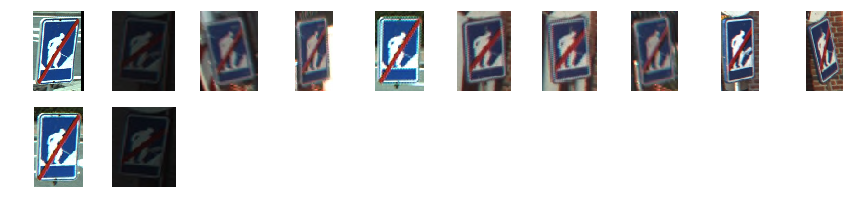

In [28]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 30  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 10, i)  # 3 rows, 10 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

display_label_images(images, 55)

### 1.3 Images of different sizes

The real-life images are not always of the same size. Human brain can understand different sized images but machine should be able to detect and classify them. 

In [17]:
for image in images[:5]:
    #checking for 5 images
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (67, 48, 3), min: 0, max: 255
shape: (136, 142, 3), min: 0, max: 218
shape: (82, 71, 3), min: 0, max: 255
shape: (69, 67, 3), min: 0, max: 255
shape: (116, 111, 3), min: 0, max: 255


In [ ]:
# Resize images
images32 = [skimage.transform.resize(image, (32, 32))
                for image in images]
display_both(images32, labels)

#This is for resizing the images into 32 by 32 size

images64= [skimage.transform.resize(image, (64, 64))
                for image in images]
display_both(images64, labels)

#This is for resizing the images into 64 by 64 size

In [ ]:
for image in images32[:10]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))
    
for image in images64[:10]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))    

## 2. Creation of graph

In [40]:
labels_a = np.array(labels)
images_a = np.array(images32)
print("labels: ", labels_a.shape, "\nimages: ", images_a.shape)

('labels: ', (4575,), '\nimages: ', (4575, 32, 32, 3))


In [ ]:
# Create a graph to hold the model.
graph = tf.Graph()

# Create model in the graph.
with graph.as_default():
    # Placeholders for inputs and labels.
    images_ph = tf.placeholder(tf.float32, [None, 32, 32, 3])
    labels_ph = tf.placeholder(tf.int32, [None])

    # Flatten input from: [None, height, width, channels]
    # To: [None, height * width * channels] == [None, 3072]
    images_flat = tf.contrib.layers.flatten(images_ph)

    # Fully connected layer. 
    # Generates logits of size [None, 62]
    logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

    # Convert logits to label indexes (int).
    # Shape [None], which is a 1D vector of length == batch_size.
    predicted_labels = tf.argmax(logits, 1)

    # Define the loss function. 
    # Cross-entropy is a good choice for classification.
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits, labels_ph))

    # Create training op.
    train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

    # And, finally, an initialization op to execute before training.
    init = tf.initialize_all_variables()

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", predicted_labels)

### 2.1 Training

In [ ]:
# Create a session to run the graph we created.
session = tf.Session(graph=graph)

# First step is always to initialize all variables. 
# We don't care about the return value, though. It's None.
_ = session.run([init])

In [ ]:
for i in range(201):
    _, loss_value = session.run([train, loss], 
                                feed_dict={images_ph: images_a, labels_ph: labels_a})
    if i % 10 == 0:
        print("Loss: ", loss_value)

### 2.2 Using it

In [ ]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: sample_images})[0]
print(sample_labels)
print(predicted)

In [ ]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])


## 3. Testing the module

It's necessary to check the accuracy of the system while at the same time ensuring that it doesn't consume too much of computation time. 

In [20]:
# Load the test dataset.
test_images, test_labels = load_dataset(test_data_dir)

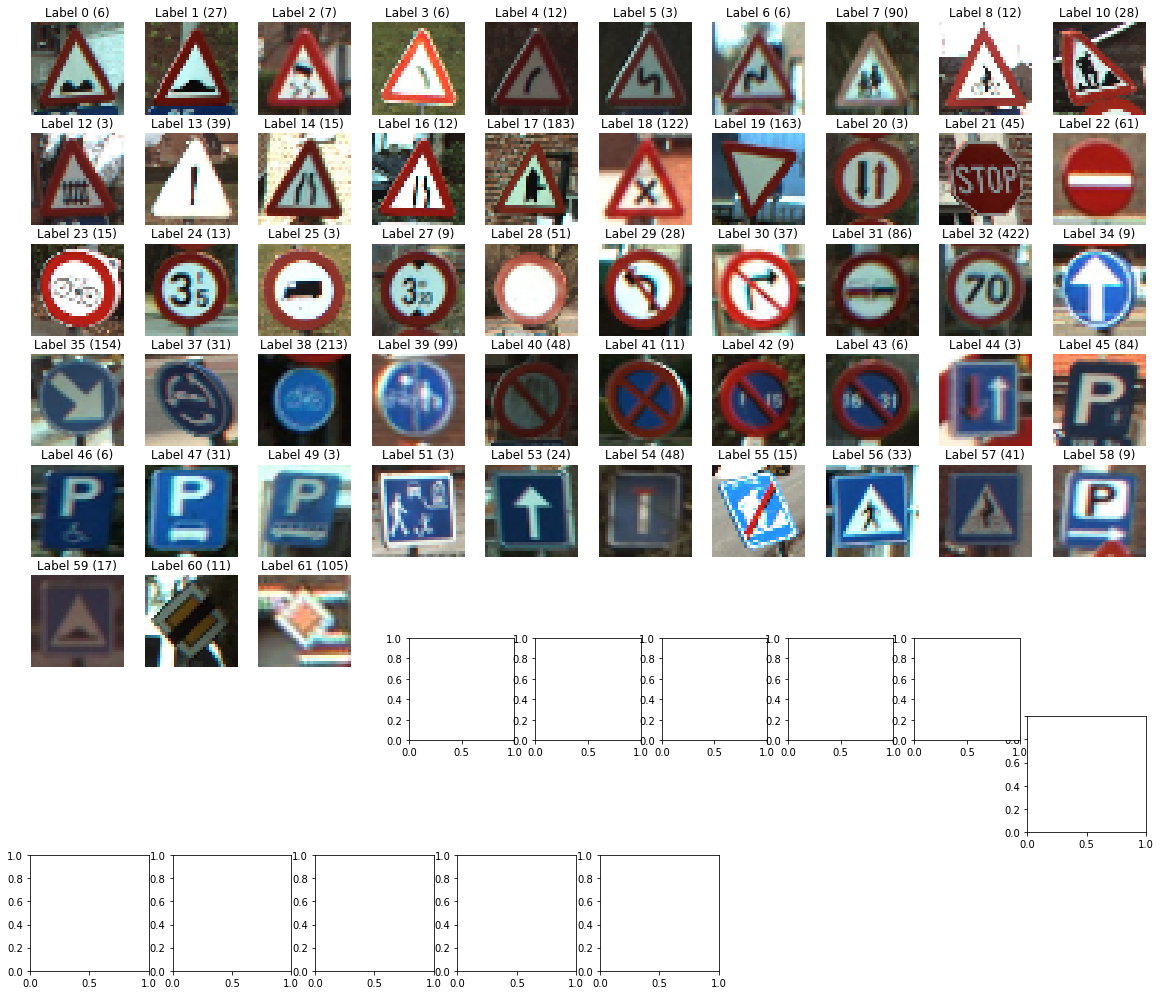

In [21]:
# Transform the images, just like we did with the training set.
test_images32 = [skimage.transform.resize(image, (32, 32))
                 for image in test_images]
display_both(test_images32, test_labels)

In [ ]:
# Run predictions against the full test set.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: test_images32})[0]
# Calculate how many matches we got.
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])
accuracy = match_count / len(test_labels)
print("Accuracy: {:.3f}".format(accuracy))